Author: <b>Zeeshan Latif</b>
<br>
[Kaggle](https://www.kaggle.com/zeeshanlatif)
<br>
[Linkedin](https://www.linkedin.com/in/zeeshan-latif-2962211b1/)
<br>
[Github](https://github.com/Zeeshan6781)

In this notebook, we will:
1. [Load an audio file](#1.)
2. [Play an audio file](#2.)
3. [Plot the audio](#3.)
4. [Trim the audio](#4.)
5. [Spectrogram](#5.)
6. [Features Extraction](#6.) <br>
    6.1. [Mel Spectrogram](#6.1.) <br>
    6.2. [Zero Crossing Rate](#6.2.) <br>
    6.3  [Spectral Centroid](#6.3) <br>
    6.4  [MFCCs](#6.4) <br>

The [dataset](https://www.kaggle.com/datasets/imsparsh/audio-speech-sentiment?select=TRAIN.csv) was downloaded from [Kaggle](https://www.kaggle.com/).

In [1]:
# importing necessary libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

import librosa
import librosa.display
from IPython import display

<a id = "1."></a>
# 1. Load an audio file

<div class="alert alert-block alert-info">
We will load the audio file using <b>librosa.load()</b> method. This method returns a tuple. The first element of the tuple is a numpy array and the second element of the tuple is an integer which is sample rate.</div>

In [2]:
audio_files = glob("/kaggle/input/audio-speech-sentiment/TRAIN/*.wav")

In [3]:
y, sr = librosa.load(audio_files[0])

<div class="alert alert-block alert-warning">
The sample rate is the number of samples of audio carried per second, measured in Hz or kHz.</div>

In [4]:
print("Type: ", type(y))
print("Shape: ", y.shape)
y

Type:  <class 'numpy.ndarray'>
Shape:  (59904,)


array([0.0013102 , 0.00192403, 0.00130106, ..., 0.00366136, 0.00276711,
       0.00300419], dtype=float32)

<div class="alert alert-block alert-warning">
We can also change the sample rate by passing sr argument to <b>librosa.load()</b> method.</div>

In [5]:
y, sr = librosa.load(audio_files[0], sr = 44100)

In [6]:
print("Type: ", type(y))
print("Shape: ", y.shape)
y

Type:  <class 'numpy.ndarray'>
Shape:  (119808,)


array([0.00210352, 0.00037134, 0.00372178, ..., 0.00253913, 0.00207969,
       0.00469662], dtype=float32)

<a id = "2."></a>
# 2. Play an audio file

<div class="alert alert-block alert-info">
We can play audio file using <b>display.Audio()</b> method.</div>

In [7]:
display.Audio(audio_files[0])

<a id = "3."></a>
# 3. Plot the audio

<div class="alert alert-block alert-info">
Let's plot the audio file by first converting the array 'y' to a pandas Series and then applying plot() method to the Series.
We can also plot the audio file using <b>librosa.display.waveshow()</b> method.</div>

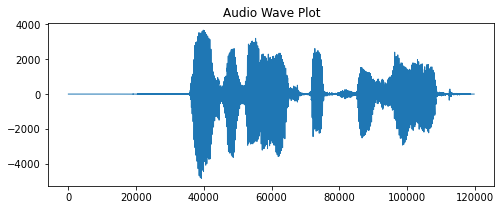

In [8]:
pd.Series(y).plot(figsize = (8, 3), lw = 1)
plt.title("Audio Wave Plot")
plt.show()

<a id = "4."></a>
# 4. Trim the audio

<div class="alert alert-block alert-info">
We can trim the audio using <b>librosa.effects.trim()</b> method.</div>

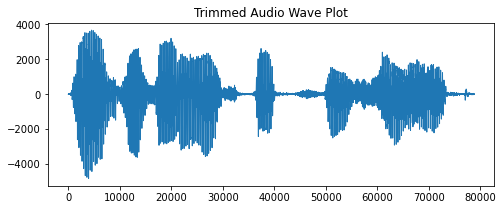

In [9]:
trimmed_y, index = librosa.effects.trim(y, top_db = 35)
pd.Series(trimmed_y).plot(figsize = (8, 3), lw = 1)
plt.title("Trimmed Audio Wave Plot")
plt.show()

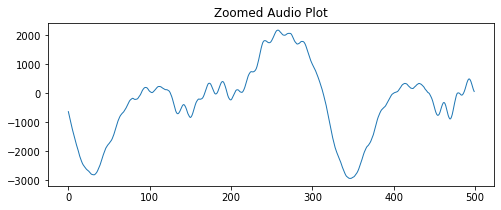

In [10]:
pd.Series(trimmed_y[25000:25500]).plot(figsize = (8, 3), lw = 1)
plt.title("Zoomed Audio Plot")
plt.show()

<a id = "5."></a>
# 5. Spectogram

<div class="alert alert-block alert-info">
A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given music signals. <b>librosa.stft</b> converts data into short term Fourier transform. STFT converts signal such that we can know the amplitude of given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. .specshow is used to display spectogram.
</div>

In [11]:
transformed_y = librosa.stft(y)
db = librosa.amplitude_to_db(abs(transformed_y))
db.shape

(1025, 235)

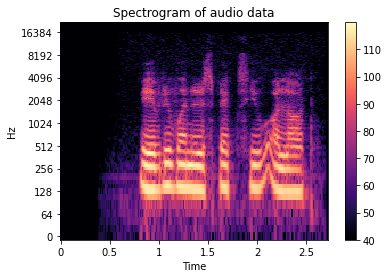

In [12]:
image = librosa.display.specshow(db, sr = sr, x_axis = "time", y_axis = "log")
plt.colorbar(image)
plt.title("Spectrogram of audio data")
plt.show()

<a id = "6."></a>
# 6. Features Extraction

<a id = "6.1."></a>
## 6.1 Mel Spectogram

<div class="alert alert-block alert-info">
A mel spectrogram logarithmically renders frequencies above a certain threshold (the corner frequency).
</div>

In [13]:
S = librosa.feature.melspectrogram(y=y, sr=sr)

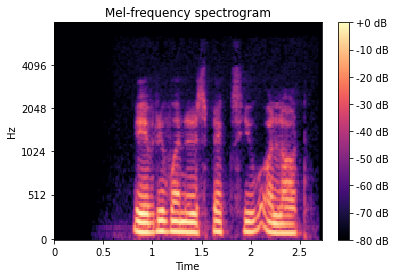

In [14]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

<a id = "6.2."></a>
## 6.2 Zero Crossing Rate

<div class="alert alert-block alert-info">
The zero-crossing rate is the rate at which a signal transitions from positive to zero to negative or negative to zero to positive.
</div>

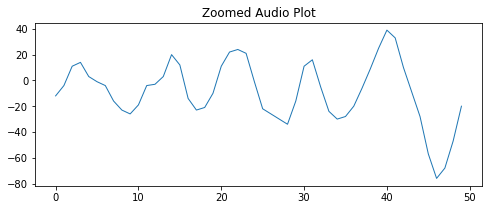

In [15]:
n0 = 80000
n1 = 80050
pd.Series(y[n0:n1]).plot(figsize = (8, 3), lw = 1)
plt.title("Zoomed Audio Plot")
plt.show()

In [16]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad = False)
print(zero_crossings.shape)
sum(zero_crossings)

(50,)


10

<a id = "6.3"></a>
## 6.3 Spectral Centroid

<div class="alert alert-block alert-info">
The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located.
</div>

In [17]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
frames = range(len(cent))
time = librosa.frames_to_time(frames)
S, phase = librosa.magphase(librosa.stft(y=y))
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)

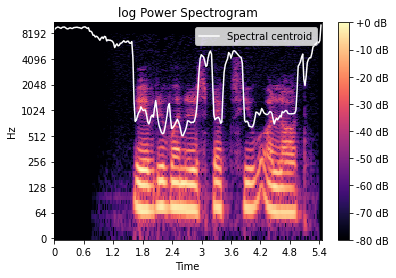

In [18]:
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.legend(loc='upper right')
ax.set(title='log Power Spectrogram')
plt.show()

<a id = "6.4"></a>
## 6.4 MFCCs

<div class="alert alert-block alert-info">
The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. 
</div>

(20, 235)


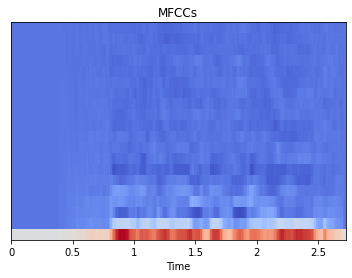

In [19]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.title("MFCCs")
plt.show()

In [20]:
print(mfccs)

[[ 2.8061359e+02  2.8061359e+02  2.8061359e+02 ...  3.2492804e+02
   2.9100833e+02  2.8061359e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.4978203e+01
   1.4407314e+01  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0267155e+01
   1.3550390e+01  0.0000000e+00]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.4605378e+00
  -1.0227273e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.2636708e-01
  -4.0046102e-01  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0186772e+00
   1.6157517e-01  0.0000000e+00]]


<div class="alert alert-block alert-warning">
Now, let's create a dataframe of these mfccs. 
</div>

In [21]:
mfcc_data = pd.DataFrame(mfccs)

In [22]:
mfcc_data.head()

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,280.613586,280.613586,280.613586,280.613586,280.613586,280.613586,280.613586,280.613586,280.613586,280.613586,...,391.540527,388.527130,369.951050,358.167267,352.464722,352.882416,351.659302,324.928040,291.008331,280.613586
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.100632,84.284309,65.451401,57.215611,53.396427,51.931046,48.763351,44.978203,14.407314,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,41.778736,43.873474,40.045670,39.194973,33.057823,32.748245,31.580339,30.267155,13.550390,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,29.695637,31.089050,32.816513,35.880409,27.192341,27.245090,25.764494,21.433187,12.194568,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.298135,1.540650,7.852465,15.648239,15.491913,13.328455,9.795811,13.894156,10.441158,0.000000


In [23]:
mfcc_data.shape

(20, 235)

<div class="alert alert-block alert-warning">
Now, we will create a dataframe of mfccs of all the audio files in our dataset.
</div>

In [24]:
mfccs = []

for i in audio_files:
    y, sr = librosa.load(i)
    y_mfcc = librosa.feature.mfcc(y, sr = sr)
    y_mfcc = y_mfcc.flatten()
    mfccs.append(y_mfcc)

In [25]:
data = pd.DataFrame(mfccs)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399
0,293.137634,293.137634,293.137634,293.137634,293.137634,293.137634,293.137634,293.137634,293.137634,293.137634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-752.934937,-752.934937,-752.934937,-752.934937,-752.934937,-752.934937,-752.934937,-752.934937,-752.934937,-752.934937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-522.897888,-560.431213,-611.849487,-611.849487,-611.849487,-611.849487,-611.849487,-611.849487,-611.849487,-611.849487,...,-0.426228,-1.628725,-6.240707,-5.783865,1.498846,-0.006561,3.659796,3.547688,-4.237297,-5.669271
3,303.815430,303.815430,303.815430,303.815430,303.815430,303.815430,303.815430,303.815430,303.815430,303.815430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-757.021423,-757.021423,-757.021423,-757.021423,-757.021423,-757.021423,-757.021423,-757.021423,-757.021423,-757.021423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.dropna(axis=1, inplace = True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479
0,293.137634,293.137634,293.137634,293.137634,293.137634,293.137634,293.137634,293.137634,293.137634,293.137634,...,-19.179594,-13.162315,-15.919338,-22.450800,-15.459716,-13.077062,-12.520933,-14.052420,-9.963078,-7.368303
1,-752.934937,-752.934937,-752.934937,-752.934937,-752.934937,-752.934937,-752.934937,-752.934937,-752.934937,-752.934937,...,-9.248730,-4.639750,-0.173721,-2.770397,-3.787192,-8.800605,-13.587262,-8.592471,-0.735157,-4.429665
2,-522.897888,-560.431213,-611.849487,-611.849487,-611.849487,-611.849487,-611.849487,-611.849487,-611.849487,-611.849487,...,4.168808,-1.856135,-2.901173,-13.138647,-17.785885,-8.775928,-1.076411,-6.072554,-8.055795,-7.670118
3,303.815430,303.815430,303.815430,303.815430,303.815430,303.815430,303.815430,303.815430,303.815430,303.815430,...,2.150791,0.379553,-2.102061,-9.746341,-14.844817,-11.836357,-5.781625,-9.695375,-35.098728,-37.220078
4,-757.021423,-757.021423,-757.021423,-757.021423,-757.021423,-757.021423,-757.021423,-757.021423,-757.021423,-757.021423,...,-11.515564,-12.001433,-12.511616,-9.252808,-7.509192,-9.512190,7.681561,8.565416,-2.050654,-8.091214


In [27]:
data.shape

(250, 1480)

<div class="alert alert-block alert-success">
Alright! That's the end of this notebook. If you like it then please upvote this notebook.
</div>